In [1]:
!pip install pandas
!pip install darts

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
  Using cached matplotlib-3.5.1-cp38-cp38-manylinux_2_5_x86_64.manylinux1_x86_64.whl (11.3 MB)
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.1.3
    Uninstalling matplotlib-3.1.3:
      Successfully uninstalled matplotlib-3.1.3


In [2]:
!python -m pip uninstall -y matplotlib
!pip install matplotlib==3.1.3

Found existing installation: matplotlib 3.5.1
Uninstalling matplotlib-3.5.1:
  Successfully uninstalled matplotlib-3.5.1
Defaulting to user installation because normal site-packages is not writeable
  Using cached matplotlib-3.1.3-cp38-cp38-manylinux1_x86_64.whl (13.1 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
nfoursid 0.1.0 requires matplotlib>=3.3, but you have matplotlib 3.1.3 which is incompatible.
darts 0.16.0 requires matplotlib>=3.3.0, but you have matplotlib 3.1.3 which is incompatible.


In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

from darts import TimeSeries
from darts.dataprocessing.transformers import Scaler
from darts import TimeSeries
from darts.utils.timeseries_generation import gaussian_timeseries, linear_timeseries, sine_timeseries
from darts.models import RNNModel, TCNModel, TransformerModel, NBEATSModel, BlockRNNModel, TFTModel
from darts.metrics import mape, smape

mpl.rcParams['figure.figsize'] = (10,8)
mpl.rcParams['axes.grid'] = False
%matplotlib inline

In [81]:
# !wget https://raw.githubusercontent.com/DigitalTwinDevelopers/TimeSeriesForecasting/main/Datasets/discharge.csv

In [82]:
df = pd.read_csv("discharge.csv")
df = df[df['Battery'] == 'B0005']
df

,Voltage_measured,Current_measured,Temperature_measured,Current_charge,Voltage_charge,Time,Capacity,id_cycle,type,ambient_temperature,time,Battery
0,3.974871,-2.012528,24.389085,1.9982,3.062,35.703,1.856487,1,discharge,24,2008.0,B0005
1,3.951717,-2.013979,24.544752,1.9982,3.030,53.781,1.856487,1,discharge,24,2008.0,B0005
2,3.934352,-2.011144,24.731385,1.9982,3.011,71.922,1.856487,1,discharge,24,2008.0,B0005
3,3.920058,-2.013007,24.909816,1.9982,2.991,90.094,1.856487,1,discharge,24,2008.0,B0005
4,3.907904,-2.014400,25.105884,1.9982,2.977,108.281,1.856487,1,discharge,24,2008.0,B0005
...,...,...,...,...,...,...,...,...,...,...,...,...
45117,2.855064,-2.012702,40.404733,1.9982,1.910,2345.875,1.325079,168,discharge,24,2008.0,B0005
45118,2.818475,-2.013183,40.406072,1.9982,1.878,2355.406,1.325079,168,discharge,24,2008.0,B0005
45119,2.774912,-2.011141,40.486980,1.9982,1.840,2364.875,1.325079,168,discharge,24,2008.0,B0005
45120,2.721142,-2.014372,40.695235,1.9982,1.794,2374.468,1.325079,168,discharge,24,2008.0,B0005


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7efd43820760>,
      dtype=object)

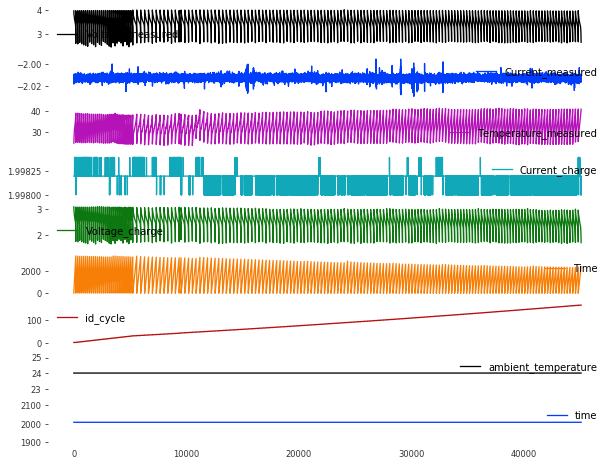

In [83]:
df[df['id_cycle']==1]
df.drop('Capacity',axis=1).plot(subplots=True)

In [84]:
dfb = df.drop(['type','Time','time','Battery'], axis=1)
dfb

,Voltage_measured,Current_measured,Temperature_measured,Current_charge,Voltage_charge,Capacity,id_cycle,ambient_temperature
0,3.974871,-2.012528,24.389085,1.9982,3.062,1.856487,1,24
1,3.951717,-2.013979,24.544752,1.9982,3.030,1.856487,1,24
2,3.934352,-2.011144,24.731385,1.9982,3.011,1.856487,1,24
3,3.920058,-2.013007,24.909816,1.9982,2.991,1.856487,1,24
4,3.907904,-2.014400,25.105884,1.9982,2.977,1.856487,1,24
...,...,...,...,...,...,...,...,...
45117,2.855064,-2.012702,40.404733,1.9982,1.910,1.325079,168,24
45118,2.818475,-2.013183,40.406072,1.9982,1.878,1.325079,168,24
45119,2.774912,-2.011141,40.486980,1.9982,1.840,1.325079,168,24
45120,2.721142,-2.014372,40.695235,1.9982,1.794,1.325079,168,24


In [85]:
capacity_df = pd.DataFrame(dfb['Capacity'])
voltage_df = pd.DataFrame(dfb['Voltage_measured'])
current_df = pd.DataFrame(dfb['Current_measured'])
curr_charge_df = pd.DataFrame(dfb['Current_charge'])
voltage_charge_df = pd.DataFrame(dfb['Voltage_charge'])
temp_df = pd.DataFrame(dfb['Temperature_measured'])
ambient_temp_df = pd.DataFrame(dfb['ambient_temperature'])

capacity_ts = TimeSeries.from_dataframe(capacity_df)
voltage_ts = TimeSeries.from_dataframe(voltage_df)
current_ts = TimeSeries.from_dataframe(current_df)
curr_charge_ts = TimeSeries.from_dataframe(curr_charge_df)
voltage_charge_ts = TimeSeries.from_dataframe(voltage_charge_df)
temp_ts = TimeSeries.from_dataframe(temp_df)
ambient_temp_ts = TimeSeries.from_dataframe(ambient_temp_df)

scaler_capacity, scaler_voltage, scaler_current, scaler_curr_charge, scaler_voltage_charge, scaler_temp, scaler_ambient_temp = Scaler(), Scaler(), Scaler(), Scaler(), Scaler(), Scaler(), Scaler()
series_capacity_scaled = scaler_capacity.fit_transform(capacity_ts)
series_voltage_scaled = scaler_voltage.fit_transform(voltage_ts)
series_current_scaled = scaler_curr_charge.fit_transform(curr_charge_ts)
series_voltage_charge_scaled = scaler_voltage_charge.fit_transform(voltage_charge_ts)
series_curr_charge_scaled = scaler_curr_charge.fit_transform(curr_charge_ts)
series_temp_scaled = scaler_temp.fit_transform(temp_ts)
series_ambient_temp_scaled = scaler_ambient_temp.fit_transform(ambient_temp_ts)

In [86]:
len(series_ambient_temp_scaled)

45122

In [87]:
train_voltage, val_voltage = series_voltage_scaled[:38000], series_voltage_scaled[38000:]
train_current, val_current = series_current_scaled[:38000], series_current_scaled[38000:]
train_curr_charge, val_curr_charge = series_curr_charge_scaled[:38000], series_curr_charge_scaled[38000:]
train_voltage_charge, val_voltage_charge = series_voltage_charge_scaled[:38000], series_voltage_charge_scaled[38000:]
train_temp, val_temp = series_temp_scaled[:38000], series_temp_scaled[38000:]
train_ambient_temp, val_ambient_temp = series_ambient_temp_scaled[:38000], series_ambient_temp_scaled[38000:]

In [89]:
model_voltage_current = TCNModel(input_chunk_length=5000, output_chunk_length=2500, n_epochs=5, random_state=0)

In [90]:
!nvidia-smi

Thu Jan 20 12:26:28 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.73.01    Driver Version: 460.73.01    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   36C    P0    32W / 250W |   1051MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [91]:
model_voltage_current.fit([train_voltage, train_current, train_curr_charge, train_voltage_charge, train_temp, train_ambient_temp], verbose=True)

[2022-01-20 12:26:29,365] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 183006 samples.
[2022-01-20 12:26:29,365] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 183006 samples.
[2022-01-20 12:26:29,369] INFO | darts.models.forecasting.tcn_model | Number of layers chosen: 11
[2022-01-20 12:26:29,369] INFO | darts.models.forecasting.tcn_model | Number of layers chosen: 11
[2022-01-20 12:26:29,377] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 64-bits; casting model to float64.
[2022-01-20 12:26:29,377] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 64-bits; casting model to float64.


  0%|          | 0/5 [00:00<?, ?it/s]

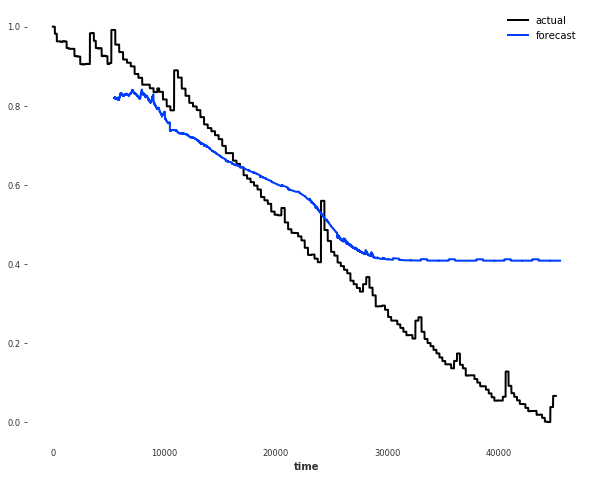

In [92]:
pred = model_voltage_current.predict(n=40000, series=series_capacity_scaled[:5500])

series_capacity_scaled.plot(label='actual')
pred.plot(label='forecast')
plt.legend();
# print('MAPE = {:.2f}%'.format(mape(series_capacity_scaled, pred)))